<br>    
<img src="https://uniandes.edu.co/sites/default/files/logo-uniandes.png" width=200 height="100" align="left">
<h1 style="text-align:center;">IELE 4922</h1>
<h3 style='text-align: right;'> Departamento de Ingeniería Eléctrica y Electrónica &emsp;<br> Facultad de Ingeniería &emsp; <br>
     Universidad de los Andes &emsp; <br>
     Taller # 6 &emsp; <br>
</h3>
&emsp;<b>Integrante 1:</b> Mauricio Ricardo Delgado Quintero - 201712801
<br>
&emsp;<b>Integrante 2:</b> Juan Camilo Pico Garrido - 201731674
<br>

1. Considere el entorno del problema del $CartPole$ de Open AI Gym. En este se tiene un carro con una pequeña pértiga unida a su centro y el objetivo de este agente es que el carro logre mantenter la pértiga balanceada hacia arriba el mayor tiempo posible.
<img src="imagen.jpg" width=400 height="150" align="middle">
Para esto el agente puede tomar solo dos acciones:
* Moverse a la izquierda (0)
* Moverse a la derecha (1)
La información que tiene del entorno (observaciones) está dada por las 4 variables de la tabla
\begin{aligned}
&\begin{array}{|c|c|c|c|}
\hline \hline \text{Num} & \text {Observación} & \text {Min} & \text {Máx} \\
\hline 0 & \text{Cart Position} & -2,4 & 2,4\\
\hline
\hline 1 & \text{Cart Velocity} & -\infty & \infty \\
\hline
\hline 2 & \text{Pole Angle} & -41,8° & 41,8° \\ 
\hline
\hline 3 & \text{Pole Velocity At Tip} &  -\infty & \infty \\
\end{array}
\end{aligned}
$$\text{Cuadro 1: Observaciones en el entorno de CartPole}$$
La recompensa es 1 por cada step del episodio y este termina cuando el ángulo de la pértiga es mayor o menor a 12°, el carro se sale de los límites del entorno o el episodio dura más de 200 steps. Para mayor información del entorno puede referirse a la [documentación de CartPole v0](https://gym.openai.com/docs/).

Utilice la libreria de [Keras-RL](https://github.com/keras-rl/keras-rl) para resolver este problema. Pruebe por lo menos dos arquitecturas de red neuronal y dos algoritmos de su elección. Grafique las curvas de aprendizaje del agente. Ponga a prueba la política aprendida y analice los resultado obtenidos.

El siguiente código fue adaptado de [Documentación Keras-RL](https://github.com/keras-rl/keras-rl/blob/master/examples/dqn_cartpole.py)

In [10]:
#Importar librerias
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory


In [11]:
%%time
#Crear el entorno
ENV_NAME = 'CartPole-v0'


#Obtener el ambiente y plantar una semilla
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# Construimos una red neuronal simple
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())


#Configuramos nuestro agente
memory = SequentialMemory(limit=50000, window_length=1)
policy = BoltzmannQPolicy()
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-2, policy=policy)

double_dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               enable_dueling_network=True, dueling_type='avg', target_model_update=1e-2, policy=policy)
double_dqn.compile(Adam(lr=1e-3), metrics=['mae'])

dqn.compile(Adam(lr=1e-3), metrics=['mae'])

#Entrenamos nuestro agente
modelo = dqn.fit(env, nb_steps=4000, visualize=True, verbose=2)
modeoloddqn = double_dqn.fit(env, nb_steps=4000, visualize=False, verbose=2)

#Evaluar el desempeño del algoritmo
dqn.test(env, nb_episodes=5, visualize=True)
double_dqn.test(env, nb_episodes=5, visualize=False)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 16)                80        
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 activation_1 (Activation)   (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 activation_2 (Activation)   (None, 16)                0

C:\Users\ASUS\anaconda3\lib\site-packages\gym\envs\registration.py:592: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\ASUS\anaconda3\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\ASUS\anaconda3\lib\site-packages\gym\core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=

None
Training for 4000 steps ...


C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
C:\Users\ASUS\anaconda3\lib\site-packages\gym\core.py:51: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


DependencyNotInstalled: pygame is not installed, run `pip install gym[classic_control]`

In [12]:
%%time
#Crear el entorno
ENV_NAME = 'CartPole-v0'


#Obtener el ambiente y plantar una semilla
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# Construimos una red neuronal simple
model2 = Sequential()
model2.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model2.add(Dense(32))
model2.add(Activation('relu'))
model2.add(Dense(32))
model2.add(Activation('relu'))
model2.add(Dense(32))
model2.add(Activation('relu'))
model2.add(Dense(nb_actions))
model2.add(Activation('linear'))
print(model.summary())


#Configuramos nuestro agente
memory = SequentialMemory(limit=50000, window_length=1)
policy = BoltzmannQPolicy()
dqn = DQNAgent(model=model2, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-2, policy=policy)

double_dqn2 = DQNAgent(model=model2, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               enable_dueling_network=True, dueling_type='avg', target_model_update=1e-2, policy=policy)
double_dqn2.compile(Adam(lr=1e-3), metrics=['mae'])

dqn.compile(Adam(lr=1e-3), metrics=['mae'])

#Entrenamos nuestro agente
modelo2 = dqn.fit(env, nb_steps=4000, visualize=True, verbose=2)
modeoloddqn2 = double_dqn.fit(env, nb_steps=4000, visualize=False, verbose=2)

#Evaluar el desempeño del algoritmo
dqn.test(env, nb_episodes=5, visualize=True)
double_dqn2.test(env, nb_episodes=5, visualize=False)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 16)                80        
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 activation_1 (Activation)   (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 activation_2 (Activation)   (None, 16)                0

DependencyNotInstalled: pygame is not installed, run `pip install gym[classic_control]`

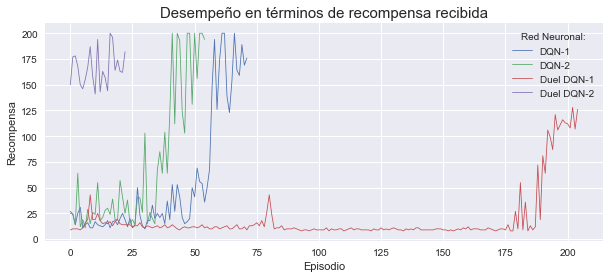

In [8]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
plt.figure(figsize=(10,4))
plt.plot(modelo.history['episode_reward'], linewidth=0.8)
plt.plot(modelo2.history['episode_reward'],linewidth=0.8)
plt.plot(modeoloddqn.history['episode_reward'],linewidth=0.8)
plt.plot(modeoloddqn2.history['episode_reward'],linewidth=0.8)
plt.title("Desempeño en términos de recompensa recibida", size=15)
plt.xlabel("Episodio")
plt.ylabel("Recompensa")
plt.legend(("DQN-1", "DQN-2","Duel DQN-1","Duel DQN-2"), title="Red Neuronal:")

plt.show()


Se observa que para las estructuras en donde se uso el algoritmo de *Duel DQN* estas parecen llegar más rápidamente a los 200 steps pero tienen un rendimiento más inestable durante el entrenamiento. Los efectos de esto se pueden ver en el test ya que ambos algoritmos tienen un rendimiento deficiente para ambos episodios (Obteniendo 9 steps en promedio).

Por otro lado, se puede observar que los algoritmos basados en DQN son más estables durante el entrenamiento y se puede observar que al evaluarlas con 5 episodios cada una, se puede observar que en los 5 episodios las 2 redes lograron mantener el *cartpole* estable por un valor cercano a los 200 steps.

Finalmente, acá se encuentra el video del rendimiento del Cartpole [Video](https://youtu.be/q5zu7iq9fig)

2. Entrene un agente para que aprenda a jugar [Freeway](https://www.gymlibrary.ml/environments/atari/freeway/) (veáse figura 2) del *Arcade Learning Environment*. Utilice la implementación de DQN que provee la librería de *[Stable Baselines](https://stable-baselines.readthedocs.io/en/master/modules/dqn.html)*:
<img src="freeway.jpg" width=400 height="150" align="middle">
* Para hacer el problema más interesante, el pollito debe iniciar su movimiento después de 500 time steps.
* Ponga a prueba la política obtenida y analice sus resultados.

Codigo adapado de: [Ejemplo](https://stable-baselines.readthedocs.io/en/master/modules/dqn.html)

In [29]:
import gym

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.deepq.policies import MlpPolicy
from stable_baselines import DQN
#Crear el ambiente
env = gym.make("ALE/Freeway-v5")

#Crear el modelo
model = DQN(MlpPolicy, env, verbose=1)
model.learn(total_timesteps=500)
model.save("deepq_Freeway")

del model #Eliminar el modelo

model = DQN.load("deepq_Freeway")

obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

ModuleNotFoundError: No module named 'tensorflow.contrib'

No lo logramos :( (Nos sale un error que dice: No module named 'tensorflow.contrib'). Entendemos que es por la versión de tensorflow pero no logramos hacer el downgrade.